# 3_2.확률분포(연습문제)3_2.확률분포(연습문제)

## 1.기본 package 설치

In [1]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

## 3.확률분포
from scipy import stats
from scipy.stats import binom # 이항분포
from scipy.stats import poisson # 포아송분포
from scipy.stats import expon # 지수분포
from scipy.stats import norm # 정규분포

## 2.이항분포
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html


In [2]:
# 이항확률분포 확률분포표
# 성공율은 80%이다. 5명의 손님이 앉은 테이블에서 3명이상 받을 확률은?

n = 5   # 시행횟수
p = 0.8  # 성공확률
x = [0,1,2,3,4,5] # 성공횟수
results = binom.pmf(x, n = n, p = p).round(3)
results1 = binom.cdf(x, n = n, p = p).round(3)

binom_df = pd.DataFrame({'x': x, 'pmf': results, 'cdf': results1})
binom_df

,x,pmf,cdf
0,0,0.000,0.000
1,1,0.006,0.007
2,2,0.051,0.058
3,3,0.205,0.263
4,4,0.410,0.672
5,5,0.328,1.000


In [3]:
# 이항분포 누적 확률값 구하기
# 성공율은 80%이다. 5명의 손님이 앉은 테이블에서 3명이상 받을 확률은?
n = 5   # 시행횟수
p = 0.8  # 성공확률
x = 2    # 성공횟수
1- binom.cdf(k = x, n = n, p = p).round(3)

0.942

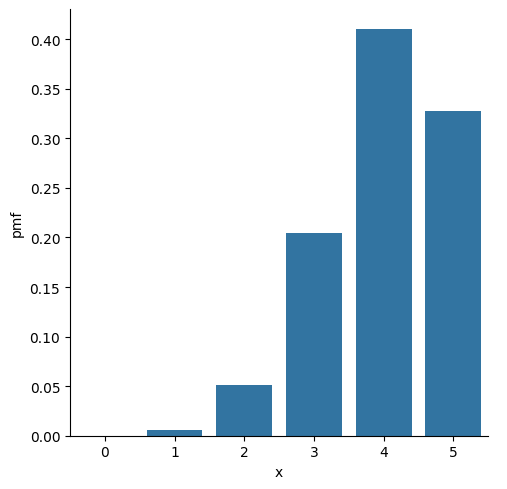

In [4]:
# seaborn
sns.catplot(x = "x",
            y = "pmf",
            kind = "bar",
            data = binom_df)
plt.show()

## 3.포아송분포

In [5]:
# 포아송분포 확률분포표
# G서비스 센터는 5분에 평균 1.5회의 전화가 온다. 5분 동안에 1회 이하로 전화를 받을 확률은?
lamb = 1.5   # 평균발생건수
x = [0,1,2,3,4,5,6,7] # 발생건수
results = poisson.pmf(x, mu = lamb).round(3)
results1 = poisson.cdf(x, mu = lamb).round(3)

poisson_df = pd.DataFrame({'x': x, 'pmf': results, 'cdf': results1})
poisson_df

,x,pmf,cdf
0,0,0.223,0.223
1,1,0.335,0.558
2,2,0.251,0.809
3,3,0.126,0.934
4,4,0.047,0.981
5,5,0.014,0.996
6,6,0.004,0.999
7,7,0.001,1.000


In [6]:
# 포아송분포 누적 확률값구하기
# G서비스 센터는 5분에 평균 1.5회의 전화가 온다. 5분 동안에 1회 이하로 전화를 받을 확률은?
lamb = 1.5   # 평균발생건수
x = 1      # 발생건수
poisson.cdf(k = x, mu = lamb).round(3)

0.558

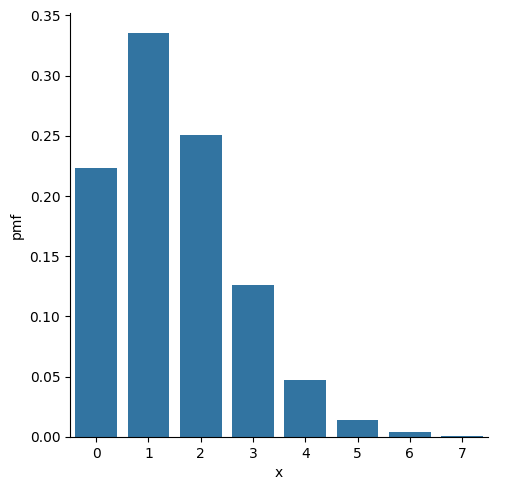

In [7]:
# seaborn
sns.catplot(x = "x",
            y = "pmf",
            kind = "bar",
            data = poisson_df)
plt.show()

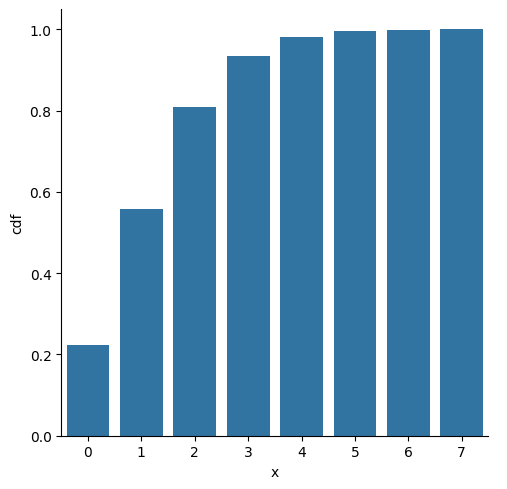

In [8]:
# seaborn
sns.catplot(x = "x",
            y = "cdf",
            kind = "bar",
            data = poisson_df)
plt.show()

## 4.지수분포
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [9]:
# 지수분포 확률값구하기
# G서비스 센터는 5분에 평균 1.5회의 전화가 온다. 대기시간이 1분 이내일 확률은?
lamb = 1.5         # 평균발생건수
scale = 1/lamb   # 평균대기시간
time = 5        # 기준시간
queue = 1        # 대기시간
x = queue/time   # 대기시간비율
expon.cdf(scale = scale, x = x).round(3)

0.259

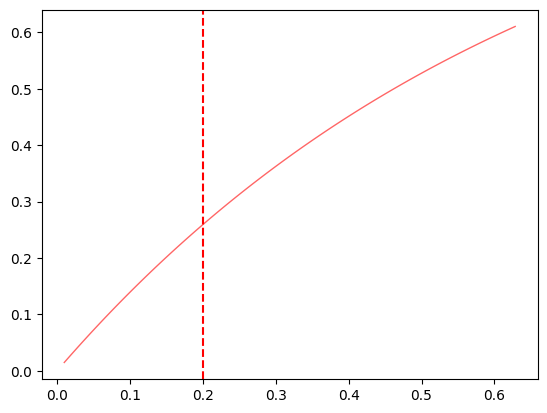

In [10]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.cdf(0.01), expon.cdf(0.99), 100)
ax.plot(x, expon.cdf(x, scale = 1/lamb), 'r-', lw=1, alpha=0.6)
plt.axvline(x = queue/time, color='r', linestyle='--')
plt.show()

## 5.정규분포

In [11]:
# 정규분포 확률값구하기
# G대학 경영통계 수업 듣는 학생의 시험점수가 평균 70, 표준편차가 20점이라고 한다.
# 75점이면 상위 몇%인가?

mu = 70 # 평균
std = 20 # 표준편차
x = 80
1-norm.cdf(x, loc = mu, scale = std).round(3)

0.30900000000000005

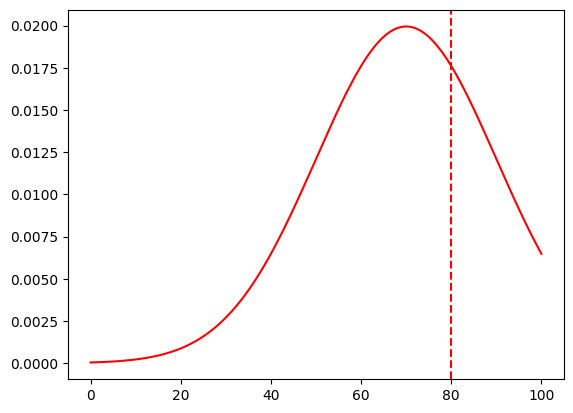

In [12]:
x_data = np.linspace(0, 100, 200)
mu = 70 # 평균
std = 20 # 표준편차
plt.plot(x_data, norm.pdf(x_data, loc = mu, scale = std), 'r-')
plt.axvline(x = 80, color='r', linestyle='--')
plt.show()

In [13]:
# 정규분포 확률값구하기
# 상위 35%에 들기 위한 점수는?

mu = 70 # 평균
std = 20 # 표준편차
q = 0.2
norm.ppf(q, loc = mu, scale = std).round(3)

53.168

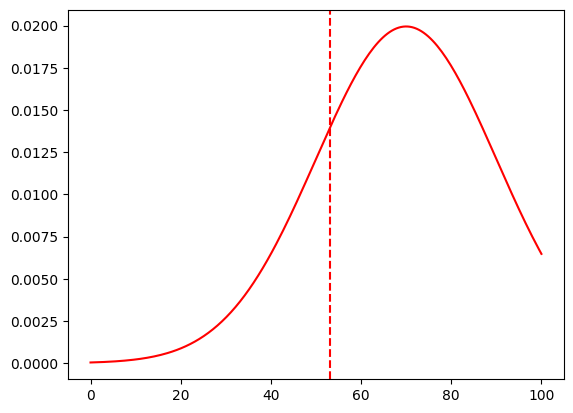

In [14]:
x_data = np.linspace(0, 100, 200)
mu = 70 # 평균
std = 20 # 표준편차
plt.plot(x_data, norm.pdf(x_data, loc = mu, scale = std), 'r-')
plt.axvline(x = 53.168, color='r', linestyle='--')
plt.show()